In [19]:
# importing modules needed

import os
import pandas as pd
import numpy as np
from scipy import stats
import openpyxl

In [20]:
# folder path created for code and also the raw files
p1 = os.getcwd()
p2 = 'Data_entime_minus15'
path = os.path.join(p1,p2)

In [21]:
# here we set the type of conveyor only which we want to merge the data

Conveyor_type = 'MET'
Data_final = pd.DataFrame()


In [22]:
# below loop will load excel files one by one
# load it into a dataframe and filter it on conveyor type
# append the filtered data to a new dataframe Data_final

for i in os.listdir(path):
    if i[-24:] == '_TEST_LOOP_RAW_DATA.xlsx':
        #print(i)
        df = pd.read_excel(path+'\\'+i)
        df2 =df[df['Sensor_Loc'].str.contains(Conveyor_type)]
        #print(df2.shape)
        Data_final = Data_final.append(df2)
print('data import for conveyor type {} sucessful'.format(Conveyor_type))

data import for conveyor type MET sucessful


In [23]:
# checking the sample of data and also the no of rows we have using shape

Data_final.shape
Data_final.head()
type(Data_final)
Data_final.reset_index(inplace=True) # had to reset index as dataframe was appending from multiple files had index of its own.
# reset index after appending


In [24]:
Data_final.to_excel('Conveyor_Type_'+Conveyor_type+'_M15_data.xlsx')

KeyboardInterrupt: 

In [25]:
# create a copy of dataFrame

Data = Data_final.copy()
processed = Data.loc[:,'Data_pull_time':'Sensor_Loc']


In [32]:
# for checking the added values

processed.head()

,Data_pull_time,Mac_Id,Axis,Defect_Introduced,Asset_Id,Sensor_Loc,Max,Min,Mean,Std,P2P,Kurt,RMS,Var
0,2020-07-13 15:40:14,29:9c:fe:16,X,No Defect_No Load,101.CA.DTL.01.1-050,MET-TST,1.968750,-1.546875,0.005970,0.214495,3.515625,15.857203,13.731299,0.046008
1,2020-07-13 16:11:10,29:9c:fe:16,X,No Defect_No Load,101.CA.DTL.01.1-050,MET-TST,0.640625,-0.562500,0.005566,0.084800,1.203125,3.319736,5.438241,0.007191
2,2020-07-14 09:20:54,29:9c:fe:16,X,No Defect_No Load,101.CA.DTL.01.1-050,MET-DSF,0.500000,-0.531250,0.006184,0.098063,1.031250,0.764959,6.287757,0.009616
3,2020-07-14 10:14:32,29:9c:fe:16,X,No Defect_No Load,101.CA.DTL.01.1-050,MET-DSF,0.781250,-0.531250,0.005722,0.111216,1.312500,1.537715,7.126370,0.012369
4,2020-07-14 10:33:04,29:9c:fe:16,X,No Defect_No Load,101.CA.DTL.01.1-050,MET-DSF,0.171875,-0.140625,0.006302,0.038998,0.312500,0.788191,2.527969,0.001521


In [46]:
processed[processed.Max > 8.0]

,Data_pull_time,Mac_Id,Axis,Defect_Introduced,Asset_Id,Sensor_Loc,Max,Min,Mean,Std,P2P,Kurt,RMS,Var
354,2020-07-13 15:37:31,84:e1:93:bd,X,No Defect_No Load,101.CA.DTL.01.1-200,MET-EDT,8.281250,-8.015625,0.229065,0.401707,16.296875,142.405036,29.592628,0.161368
419,2020-07-19 16:42:37,84:e1:93:bd,X,No Defect_No Load,101.CA.DTL.01.1-200,MET-EDT,8.140625,-4.187500,0.635834,0.664155,12.328125,16.158755,58.840999,0.441102
489,2020-07-19 16:43:15,84:e1:93:bd,Y,No Defect_No Load,101.CA.DTL.01.1-200,MET-EDT,8.125000,-7.750000,0.051819,0.375243,15.875000,109.861083,24.240535,0.140807
493,2020-07-13 15:38:59,84:e1:93:bd,Z,No Defect_No Load,101.CA.DTL.01.1-200,MET-EDT,9.046875,-8.093750,0.918781,0.430832,17.140625,207.263463,64.944378,0.185616
558,2020-07-19 16:43:45,84:e1:93:bd,Z,No Defect_No Load,101.CA.DTL.01.1-200,MET-EDT,8.296875,-8.593750,-0.585484,0.683848,16.890625,31.856596,57.611570,0.467649
643,2020-07-13 15:35:37,8a:18:56:08,Z,No Defect_No Load,101.CA.DTL.01.1-050,MET-EDT,8.453125,-0.390625,0.532738,0.442060,8.843750,58.330759,44.302549,0.195417


### calculate max,   min,   average,   std for each row

In [27]:
processed['Max'] = Data.loc[:,'Vsample1':'Vsample4096'].max(axis=1)
processed['Min'] = Data.loc[:,'Vsample1':'Vsample4096'].min(axis=1)
processed['Mean'] = Data.loc[:,'Vsample1':'Vsample4096'].mean(axis=1)
processed['Std'] = Data.loc[:,'Vsample1':'Vsample4096'].std(axis=1)

### Peak to Peak

In [28]:
processed['P2P'] = Data.loc[:,'Vsample1':'Vsample4096'].max(axis=1) - Data.loc[:,'Vsample1':'Vsample4096'].min(axis=1)

### kurtosis

In [29]:
processed['Kurt'] = Data.loc[:,'Vsample1':'Vsample4096'].kurt(axis=1)

### RMS

In [30]:
processed['RMS'] =  (Data.loc[:,'Vsample1':'Vsample4096']**2).sum(1).pow(1/2)

### Variance

In [31]:
processed['Var'] = Data.loc[:,'Vsample1':'Vsample4096'].var(axis=1)

### Remove G as per vishal   RMS < 0.2 and Kurt < 300 and freq side

# analyse by graphs

In [ ]:
Data_final.iloc[:20,:]

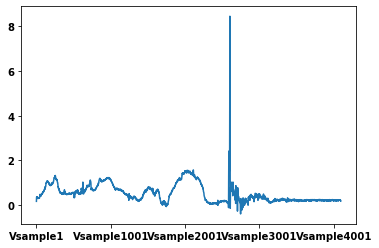

In [47]:
#for i in range(10):
row = Data_final.iloc[643]['Vsample1':'Vsample4096']
row.plot()

In [42]:
row = processed['P2P']

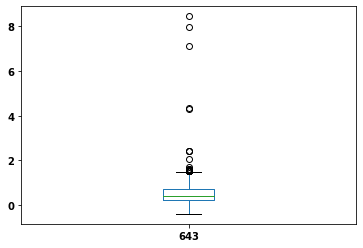

In [48]:
row.plot.box()

In [ ]:
processed.groupby('Defect_Introduced').max()

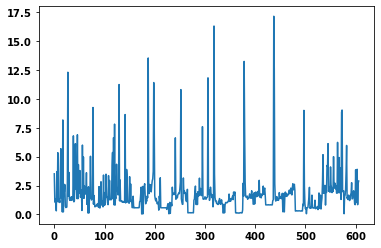

In [33]:
processed['P2P'].plot()

In [18]:
processed.shape

(656, 14)

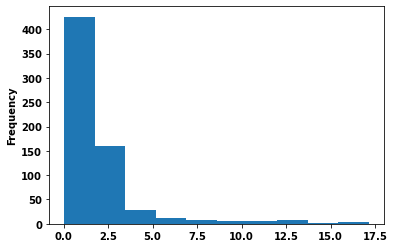

In [17]:
processed['P2P'].plot.hist()

### Frequency Distribution

In [31]:
Sec = 1.279374957 # sampling duration
N = 4096   # samples

Fs_rate = round(N/Sec)
Fs_rate    # in 1 second we sampled 3200 samples 

3202

In [37]:
Secs  = Sec/N
Secs # at what time interval we sampled the data 


Ts = 1/Fs_rate
Ts

0.0003123048094940662

In [ ]:
processed.iloc[493][]

### export plots of rows in dataframe

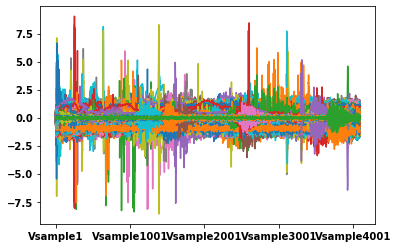

In [54]:
for i, row in Data_final.iterrows():
    row['Vsample1':'Vsample4096'].plot()

In [ ]:
plot = dtf.plot()
fig = plot.get_figure()
fig.savefig("output.png")